In [30]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_features(img_path, model):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Image '{img_path}' could not be read. Skipping...")
        return None

    img = cv2.resize(img, (224, 224))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    return features

def collect_image_paths(root_folder):
    image_paths = []
    for folder, _, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')): 
                image_paths.append(os.path.join(folder, file))
    return image_paths


vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

root_folder = "C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset"

image_paths = collect_image_paths(root_folder)

# Extract features and merge into a single vector database
vector_database = []
for img_path in image_paths:
    features = extract_features(img_path, vgg_model)
    vector_database.append(features)



1/1 [==============================] - 0s 116ms/step
Error: Image 'C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset\Baroque\Earthquake Baroque Architecture\129.jpg' could not be read. Skipping...
1/1 [==============================] - 0s 109ms/step
Error: Image 'C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset\Baroque\Sicilian Baroque Architecture\1529.jpg' could not be read. Skipping...
1/1 [==============================] - 0s 113ms/step
Error: Image 'C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset\Classical\Herodian architecture\2233.jpg' could not be read. Skipping...
1/1 [==============================] - 0s 123ms/step
Error: Image 'C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset\Early_Christian_Medieval\Norman Architecture\3333.jpg' could not be read. Skipping...
1/1 [==============================] - 0s 132ms/step
Error: Image 'C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset\Modernism\Brutalism\5293.jpg' co

In [32]:
reshaped_database = [feature.flatten() for feature in vector_database if feature is not None]
vector_database = np.array(reshaped_database)

# Save the vector database
np.save("vector_database.npy", vector_database)

In [33]:
all_same_length = all(len(vector) == len(vector_database[0]) for vector in vector_database)

if all_same_length:
  print("All vectors in the database have the same length.")
else:
  print("Vectors in the database have different lengths!")


All vectors in the database have the same length.


In [36]:
print(len(vector_database))
print(len(vector_database[0]))

12276
512


In [50]:
import os
import numpy as np
from PIL import Image
from io import BytesIO
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import matplotlib.pyplot as plt

uploaded_image_path = "C:/Users/zahra/Downloads/archi_images_test/Zaha Hadid/1 (58).jpg"  # Example path to uploaded image

import numpy as np
from PIL import Image
from keras.applications.vgg16 import preprocess_input

def extract_features_from_image(img_path, model):
    try:
        img = Image.open(img_path)
        img = img.resize((224, 224)) 
        img = np.array(img)
    except Exception as e:
        print(f"Error: Unable to process image '{img_path}': {e}")
        return None

    img = img[..., ::-1] 
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    features = model.predict(img)
    features = features.flatten()
    return features

uploaded_image_features = extract_features_from_image(uploaded_image_path , vgg_model)

print(len(uploaded_image_features))






1/1 [==============================] - 0s 148ms/step
512


In [53]:

def calculate_cosine_similarity(query_vector, database_vectors):
    similarities = cosine_similarity(query_vector.reshape(1, -1), database_vectors)
    return similarities.flatten()

def retrieve_similar_images(query_vector, database_vectors, top_k=5):
    # if len(query_vector.shape) == 1:
    #     query_vector = query_vector.reshape(1, -1)  # Reshape to 2D if necessary
    similarities = calculate_cosine_similarity(query_vector, database_vectors)
    similar_indices = np.argsort(similarities)[::-1][:top_k]
    return similar_indices


# uploaded_image_path =  "C:/Users/zahra/Downloads/Capstone_Architectural_Styles_dataset/Revivalism/Tudor Revival architecture/854.jpg"

if uploaded_image_features is not None:
        similar_indices = retrieve_similar_images(uploaded_image_features, vector_database, top_k=5)

print(similar_indices)



[  6 175 862 375 852]


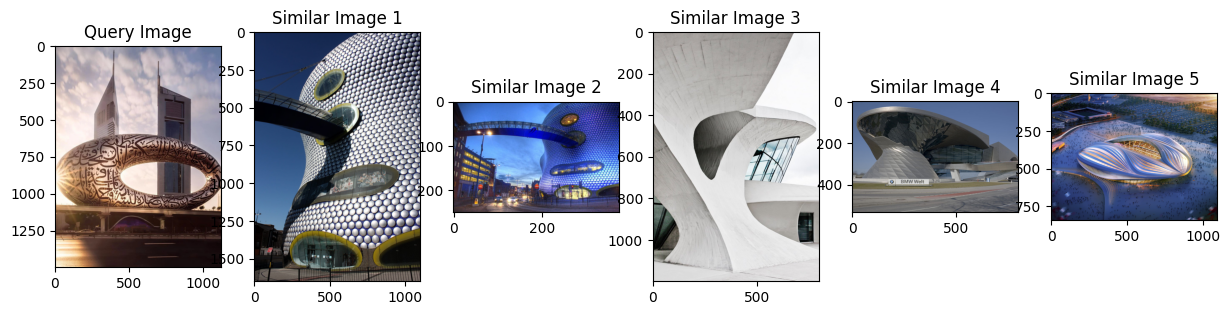

In [58]:
def display_similar_images(uploaded_image_path , similar_indices, images_path):
    fig, axes = plt.subplots(1, len(similar_indices) + 1, figsize=(15, 5))
    query_img = plt.imread(uploaded_image_path)
    axes[0].imshow(query_img)
    axes[0].set_title('Query Image')

    for i, idx in enumerate(similar_indices, 1):
        similar_img_path = images_path[idx]
        similar_img = plt.imread(similar_img_path)
        axes[i].imshow(similar_img)
        axes[i].set_title(f'Similar Image {i}')

    plt.show()

# Call the function to display similar images
display_similar_images(uploaded_image_path, similar_indices, image_paths)


Another Test.

1/1 [==============================] - 0s 176ms/step


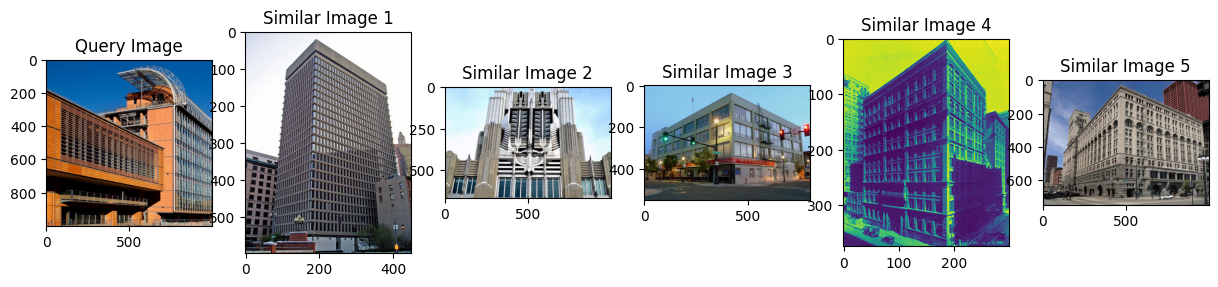

In [59]:
uploaded_image_path2 = "C:/Users/zahra/Downloads/archi_images_test/Renzo Piano/1 (1).jpg"
uploaded_image_features2 = extract_features_from_image(uploaded_image_path2 , vgg_model)
if uploaded_image_features2 is not None:
        similar_indices2 = retrieve_similar_images(uploaded_image_features2, vector_database, top_k=5)
        
# Call the function to display similar images
display_similar_images(uploaded_image_path2 , similar_indices2, image_paths)



  